## IMPORTING THE REQUIRED LIBRARIES

In [7]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Balancing the imbalanced data
from imblearn.combine import SMOTETomek

# For selecting the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Score and Performace Metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# For Train and Test Split
from sklearn import model_selection

# For binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'geopandas'

## IMPORTING THE DATA FILE

In [3]:
# Importing the data file

data=pd.read_excel("C:/Users/Sukriti Macker/All Internship Works/Peacock Solar/Peacock Solar Data Analytics Intern/Data Analytics Work.xlsx")

In [3]:
# Understanding the content and the data provided

data.head(4)

,Unnamed: 0,Full name,Age,Marital Status,Gender,Which type of organization do you work for?,Name of Profession,What is the type of home that you own?,Number of Floors in House,How many people live in your household(including children)?,...,Which one would you prefer ?,Do you have any relative/friend that bought a solar system?,Do you know any Solar Panel installation companies ?,Name the Solar company you know,Who owns the house you live in?,Which city is your house at?,Are you filling this form on behalf of your parents/others?,What are your computer brands?,State Name,Solar Panel Purchased or Not
0,0,sweta singh,15-25,Single,Female,Private,hr,Flat(On Rent),4+,NaN,...,4-star rated appliance,NaN,No,peacock solar,NaN,NaN,NaN,NaN,NaN,No
1,1,Ajay Babu,15-25,Single,Male,Private,Logistics,Independent house or Villa,Ground Floor,5.0,...,4-star rated appliance,No,Yes,Roofsol,NaN,NaN,NaN,NaN,NaN,No
2,2,Ajumal Khan A,15-25,Single,Male,Business,Self Employed,Independent house or Villa,2 Floors,5.0,...,5-star rated appliance (with Extra services an...,NaN,No,Enerparc,NaN,NaN,NaN,NaN,NaN,No
3,3,Navya Venugopal,15-25,Single,Female,NGO,social worker,Flat(On Rent),3 Floors,3.0,...,4-star rated appliance,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No


## MANIPULATING THE DATA

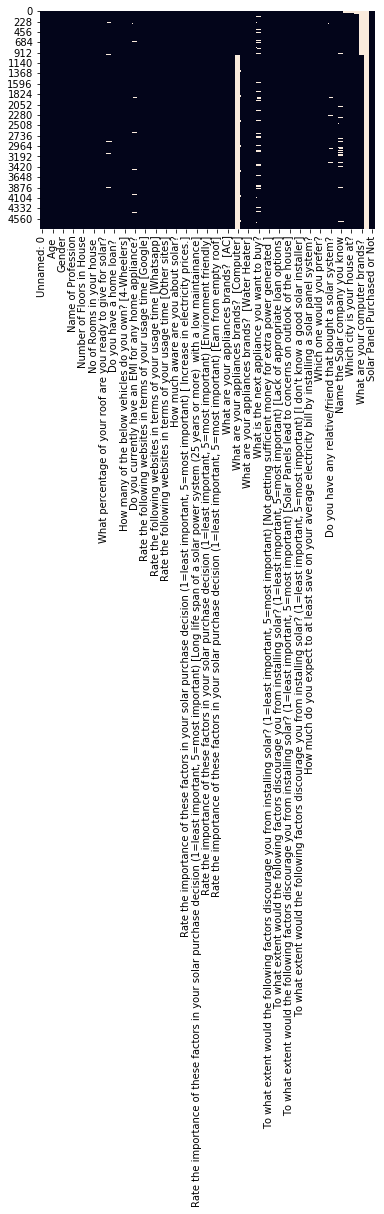

In [6]:
## Finding the missing values

sns.heatmap(data.isnull(), cbar = False)

#### Dropping the columns which are mostly empty and won't contribute to the final result

In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.drop("Name of Profession",axis=1,inplace=True)

In [7]:
data.drop("What is the type of home that you own?",axis=1,inplace=True)

In [8]:
data.drop("Do you plan to build an additional floor? (If other, what does it depend on?)",axis=1,inplace=True)

In [9]:
data.drop("Plot size of the house (In Square yards)",axis=1,inplace=True)

In [10]:
data.drop("Which payment method do you use the most?",axis=1,inplace=True)

In [11]:
data.drop("What electrical appliances do you own?",axis=1,inplace=True)

In [12]:
data.drop("What is the next appliance you want to buy?",axis=1,inplace=True)

In [13]:
data.drop("Name the Solar company you know",axis=1,inplace=True)

In [14]:
data.drop("Who owns the house you live in?",axis=1,inplace=True)

In [15]:
data.drop("What are your computer brands? ",axis=1,inplace=True)

#### To maintain uniformity in the data, filling in the columns that have missing values using Mean, Median or Mode where necessary

In [16]:
data["Which type of organization do you work for?"].fillna(data["Which type of organization do you work for?"].mode()[0],inplace=True)

In [17]:
data["How many people live in your household(including children)?"].fillna(data["How many people live in your household(including children)?"].median(),inplace=True)

In [18]:
data["What percentage of your roof are you ready to give for solar?"].fillna(data["What percentage of your roof are you ready to give for solar?"].mode()[0],inplace=True)

In [19]:
data["Do you have a home loan? "].fillna(data["Do you have a home loan? "].mode()[0],inplace=True)

In [20]:
data["How many of the below vehicles do you own? [2-Wheelers]"].fillna(data["How many of the below vehicles do you own? [2-Wheelers]"].mode()[0],inplace=True)

In [21]:
data["How many of the below vehicles do you own? [4-Wheelers]"].fillna(data["How many of the below vehicles do you own? [4-Wheelers]"].mode()[0],inplace=True)

In [22]:
data["Do you currently have an EMI for any home appliance?"].fillna(data["Do you currently have an EMI for any home appliance?"].mode()[0],inplace=True)

In [23]:
data["What are your appliances brands?  [AC]"].fillna(data["What are your appliances brands?  [AC]"].mode()[0],inplace=True)

In [24]:
data["What are your appliances brands?  [Refrigerator]"].fillna(data["What are your appliances brands?  [Refrigerator]"].mode()[0],inplace=True)

In [25]:
data["What are your appliances brands?  [Computer]"].fillna(data["What are your appliances brands?  [Computer]"].mode()[0],inplace=True)

In [26]:
data["What are your appliances brands?  [TV]"].fillna(data["What are your appliances brands?  [TV]"].mode()[0],inplace=True)

In [27]:
data["What are your appliances brands?  [Water Heater]"].fillna(data["What are your appliances brands?  [Water Heater]"].mode()[0],inplace=True)

In [28]:
data["What are your appliances brands?  [Washing Machine]"].fillna(data["What are your appliances brands?  [Washing Machine]"].mode()[0],inplace=True)

In [29]:
data["Do you have any relative/friend that bought a solar system?"].fillna(data["Do you have any relative/friend that bought a solar system?"].mode()[0],inplace=True)

In [30]:
data["Are you filling this form on behalf of your parents/others?"].fillna(data["Are you filling this form on behalf of your parents/others?"].mode()[0],inplace=True)

#### To establish uniformity in 'Gender' column the values are manipulated and changed to the following:- Male, Female & Others

In [31]:
def cleaning_names(var):
    if var=='Single':
        return var
    elif var=='Married':
        return var
    else:
        return ('Others')

In [32]:
data['Marital Status']=data['Marital Status'].apply(cleaning_names)

#### To establish uniformity in the 'Which city is your house at' column, each city is raised to the level of its respective states so that the data can provide better and efficient results

In [33]:
state_city={"Andhra Pradesh": [ "Adilabad", "Anantapur", "Chittoor", "Kakinada", "Guntur", "Hyderabad", "Karimnagar", "Khammam", "Krishna", "Kurnool", "Mahbubnagar", "Medak", "Nalgonda", "Nizamabad", "Ongole", "Hyderabad", "Srikakulam", "Nellore", "Visakhapatnam", "Vizianagaram", "Warangal", "Eluru", "Kadapa"], "Arunachal Pradesh": [ "Anjaw", "Changlang", "East Siang", "Kurung Kumey", "Lohit", "Lower Dibang Valley", "Lower Subansiri", "Papum Pare", "Tawang", "Tirap", "Dibang Valley", "Upper Siang", "Upper Subansiri", "West Kameng", "West Siang"], "Assam": [ "Baksa", "Barpeta", "Bongaigaon", "Cachar", "Chirang", "Darrang", "Dhemaji", "Dima Hasao", "Dhubri", "Dibrugarh", "Goalpara", "Golaghat", "Hailakandi", "Jorhat", "Kamrup", "Kamrup Metropolitan", "Karbi Anglong", "Karimganj", "Kokrajhar", "Lakhimpur", "Marigaon", "Nagaon", "Nalbari", "Sibsagar", "Sonitpur", "Tinsukia", "Udalguri"], "Bihar": [ "Araria", "Arwal", "Aurangabad", "Banka", "Begusarai", "Bhagalpur", "Bhojpur", "Buxar", "Darbhanga", "East Champaran", "Gaya", "Gopalganj", "Jamui", "Jehanabad", "Kaimur", "Katihar", "Khagaria", "Kishanganj", "Lakhisarai", "Madhepura", "Madhubani", "Munger", "Muzaffarpur", "Nalanda", "Nawada", "Patna", "Purnia", "Rohtas", "Saharsa", "Samastipur", "Saran", "Sheikhpura", "Sheohar", "Sitamarhi", "Siwan", "Supaul", "Vaishali", "West Champaran", "Chandigarh"], "Chhattisgarh": [ "Bastar", "Bijapur", "Bilaspur", "Dantewada", "Dhamtari", "Durg", "Jashpur", "Janjgir-Champa", "Korba", "Koriya", "Kanker", "Kabirdham (Kawardha)", "Mahasamund", "Narayanpur", "Raigarh", "Rajnandgaon", "Raipur", "Surguja"], "Dadra and Nagar Haveli": [ "Dadra and Nagar Haveli" ], "Daman and Diu": [ "Daman", "Diu"], "Delhi": [ "Central Delhi", "East Delhi", "New Delhi", "North Delhi", "North East Delhi", "North West Delhi", "South Delhi", "South West Delhi", "West Delhi","Delhi",'New Delhi','NEW DELHI','DELHI'], "Goa": [ "North Goa", "South Goa" ], "Gujarat": [ "Ahmedabad", "Amreli district", "Anand", "Banaskantha", "Bharuch", "Bhavnagar", "Dahod", "The Dangs", "Gandhinagar", "Jamnagar", "Junagadh", "Kutch", "Kheda", "Mehsana", "Narmada", "Navsari", "Patan", "Panchmahal", "Porbandar", "Rajkot", "Sabarkantha", "Surendranagar", "Surat", "Vyara", "Vadodara", "Valsad"], "Haryana": [ "Ambala", "Bhiwani", "Faridabad", "Fatehabad", "Gurgaon", "Hissar", "Jhajjar", "Jind", "Karnal", "Kaithal", "Hisar", "Kurukshetra", "Mahendragarh", "Mewat", "Palwal", "Panchkula", "Panipat", "Rewari", "Rohtak", "Sirsa", "Sonipat", "Yamuna Nagar"], "Himachal Pradesh": [ "Bilaspur", "Chamba", "Hamirpur", "Kangra", "Kinnaur", "Kullu", "Lahaul and Spiti", "Mandi", "Shimla", "Sirmaur", "Solan", "Una"], "Jammu and Kashmir": [ "Anantnag", "Badgam", "Bandipora", "Baramulla", "Doda", "Ganderbal", "Jammu", "Kargil", "Kathua", "Kishtwar", "Kupwara", "Kulgam", "Leh", "Poonch", "Pulwama", "Rajauri", "Ramban", "Reasi", "Samba", "Shopian", "Srinagar", "Udhampur"], "Jharkhand": [ "Bokaro", "Chatra", "Deoghar", "Dhanbad", "Dumka", "East Singhbhum", "Garhwa", "Giridih", "Godda", "Gumla", "Hazaribag", "Jamtara", "Khunti", "Koderma", "Latehar", "Lohardaga", "Pakur", "Palamu", "Ramgarh", "Ranchi", "Sahibganj", "Seraikela Kharsawan", "Simdega", "West Singhbhum"], "Karnataka": [ "Bagalkot", "Bangalore Rural", "Bangalore Urban", "Belgaum", "Bellary", "Bidar", "Bijapur", "Chamarajnagar", "Chikkamagaluru", "Chikkaballapur", "Chitradurga", "Davanagere", "Dharwad", "Dakshina Kannada", "Gadag", "Gulbarga", "Hassan", "Haveri district", "Kodagu", "Kolar", "Koppal", "Mandya", "Mysore", "Raichur", "Shimoga", "Tumkur", "Udupi", "Uttara Kannada", "Ramanagara", "Yadgir"], "Kerala": [ "Alappuzha", "Ernakulam", "Idukki", "Kannur", "Kasaragod", "Kollam", "Kottayam", "Kozhikode", "Malappuram", "Palakkad", "Pathanamthitta", "Thrissur", "Thiruvananthapuram", "Wayanad"], "Madhya Pradesh": [ "Alirajpur", "Anuppur", "Ashok Nagar", "Balaghat", "Barwani", "Betul", "Bhind", "Bhopal", "Burhanpur", "Chhatarpur", "Chhindwara", "Damoh", "Datia", "Dewas", "Dhar", "Dindori", "Guna", "Gwalior", "Harda", "Hoshangabad", "Indore", "Jabalpur", "Jhabua", "Katni", "Khandwa (East Nimar)", "Khargone (West Nimar)", "Mandla", "Mandsaur", "Morena", "Narsinghpur", "Neemuch", "Panna", "Rewa", "Rajgarh", "Ratlam", "Raisen", "Sagar", "Satna", "Sehore", "Seoni", "Shahdol", "Shajapur", "Sheopur", "Shivpuri", "Sidhi", "Singrauli", "Tikamgarh", "Ujjain", "Umaria", "Vidisha"], "Maharashtra": [ "Ahmednagar", "Akola", "Amravati", "Aurangabad", "Bhandara", "Beed", "Buldhana", "Chandrapur", "Dhule", "Gadchiroli", "Gondia", "Hingoli", "Jalgaon", "Jalna", "Kolhapur", "Latur", "Mumbai City", "Mumbai suburban", "Nandurbar", "Nanded", "Nagpur", "Nashik", "Osmanabad", "Parbhani", "Pune", "Raigad", "Ratnagiri", "Sindhudurg", "Sangli", "Solapur", "Satara", "Thane", "Wardha", "Washim", "Yavatmal"], "Manipur": [ "Bishnupur", "Churachandpur", "Chandel", "Imphal East", "Senapati", "Tamenglong", "Thoubal", "Ukhrul", "Imphal West"], "Meghalaya": [ "East Garo Hills", "East Khasi Hills", "Jaintia Hills", "Ri Bhoi", "South Garo Hills", "West Garo Hills", "West Khasi Hills"], "Mizoram": [ "Aizawl", "Champhai", "Kolasib", "Lawngtlai", "Lunglei", "Mamit", "Saiha", "Serchhip"], "Nagaland": [ "Dimapur", "Kohima", "Mokokchung", "Mon", "Phek", "Tuensang", "Wokha", "Zunheboto"], "Orissa": [ "Angul", "Boudh (Bauda)", "Bhadrak", "Balangir", "Bargarh (Baragarh)", "Balasore", "Cuttack", "Debagarh (Deogarh)", "Dhenkanal", "Ganjam", "Gajapati", "Jharsuguda", "Jajpur", "Jagatsinghpur", "Khordha", "Kendujhar (Keonjhar)", "Kalahandi", "Kandhamal", "Koraput", "Kendrapara", "Malkangiri", "Mayurbhanj", "Nabarangpur", "Nuapada", "Nayagarh", "Puri", "Rayagada", "Sambalpur", "Subarnapur (Sonepur)", "Sundergarh"], "Puducherry":["Pondicherry","Yanam","Mahe","Karaikal"],"Punjab": [ "Amritsar", "Barnala", "Bathinda", "Firozpur", "Faridkot", "Fatehgarh Sahib", "Fazilka", "Gurdaspur", "Hoshiarpur", "Jalandhar", "Kapurthala", "Ludhiana", "Mansa", "Moga", "Sri Muktsar Sahib", "Pathankot", "Patiala", "Rupnagar", "Ajitgarh","Mohali", "Sangrur", "Nawanshahr", "Tarn Taran"], "Rajasthan": [ "Ajmer", "Alwar", "Bikaner", "Barmer", "Banswara", "Bharatpur", "Baran", "Bundi", "Bhilwara", "Churu", "Chittorgarh", "Dausa", "Dholpur", "Dungapur", "Ganganagar", "Hanumangarh", "Jhunjhunu", "Jalore", "Jodhpur", "Jaipur", "Jaisalmer", "Jhalawar", "Karauli", "Kota", "Nagaur", "Pali", "Pratapgarh", "Rajsamand", "Sikar", "Sawai Madhopur", "Sirohi", "Tonk", "Udaipur"], "Sikkim": [ "East Sikkim", "North Sikkim", "South Sikkim", "West Sikkim"], "Tamil Nadu": [ "Ariyalur", "Chennai", "Coimbatore", "Cuddalore", "Dharmapuri", "Dindigul", "Erode", "Kanchipuram", "Kanyakumari", "Karur", "Madurai", "Nagapattinam", "Nilgiris", "Namakkal", "Perambalur", "Pudukkottai", "Ramanathapuram", "Salem", "Sivaganga", "Tirupur", "Tiruchirappalli", "Theni", "Tirunelveli", "Thanjavur", "Thoothukudi", "Tiruvallur", "Tiruvarur", "Tiruvannamalai", "Vellore", "Viluppuram", "Virudhunagar"], "Tripura": [ "Dhalai", "North Tripura", "South Tripura", "Khowai", "West Tripura"], "Uttar Pradesh": [ "Agra", "Allahabad", "Aligarh", "Ambedkar Nagar", "Auraiya", "Azamgarh", "Barabanki", "Budaun", "Bagpat", "Bahraich", "Bijnor", "Ballia", "Banda", "Balrampur", "Bareilly", "Basti", "Bulandshahr", "Chandauli", "Chhatrapati Shahuji Maharaj Nagar", "Chitrakoot", "Deoria", "Etah", "Kanshi Ram Nagar", "Etawah", "Firozabad", "Farrukhabad", "Fatehpur", "Faizabad", "Gautam Buddh Nagar", "Gonda", "Ghazipur", "Gorakhpur", "Ghaziabad", "Hamirpur", "Hardoi", "Mahamaya Nagar", "Jhansi", "Jalaun", "Jyotiba Phule Nagar", "Jaunpur district", "Ramabai Nagar (Kanpur Dehat)", "Kannauj", "Kanpur", "Kaushambi", "Kushinagar", "Lalitpur", "Lakhimpur Kheri", "Lucknow", "Mau", "Meerut", "Maharajganj", "Mahoba", "Mirzapur", "Moradabad", "Mainpuri", "Mathura", "Muzaffarnagar", "Panchsheel Nagar district (Hapur)", "Pilibhit", "Shamli", "Pratapgarh", "Rampur", "Raebareli", "Saharanpur", "Sitapur", "Shahjahanpur", "Sant Kabir Nagar", "Siddharthnagar", "Sonbhadra", "Sant Ravidas Nagar", "Sultanpur", "Shravasti", "Unnao", "Varanasi"], "Uttarakhand": [ "Almora", "Bageshwar", "Chamoli", "Champawat", "Dehradun", "Haridwar", "Nainital", "Pauri Garhwal", "Pithoragarh", "Rudraprayag", "Tehri Garhwal", "Udham Singh Nagar", "Uttarkashi"], "West Bengal": [ "Birbhum", "Bankura", "Bardhaman", "Darjeeling", "Dakshin Dinajpur", "Hooghly", "Howrah", "Jalpaiguri", "Cooch Behar", "Kolkata", "Maldah", "Paschim Medinipur", "Purba Medinipur", "Murshidabad", "Nadia", "North 24 Parganas", "South 24 Parganas", "Purulia", "Uttar Dinajpur"]}

In [34]:
def city_to_state(var):
    for key,value in state_city.items():
        for i in value:
            if i==var:
                return(key)
            

In [35]:
data["State Name"]=data["Which city is your house at?"].apply(city_to_state)

In [36]:
state=list(data["State Name"])
state

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 None,
 None,
 None,
 None,
 None,
 'Andhra Pradesh',
 None,
 'Andhra Pradesh',
 None,
 None,
 None,
 None,
 'Andhra Pradesh',
 None,
 'Andhra Pradesh',
 None,
 None,
 'Andhra Pradesh',
 'Kerala',
 'Kerala',
 None,
 'Kerala',
 None,
 'Kerala',
 None,
 'Kerala',
 None,
 'Kerala',
 'Kerala',
 'Andhra Pradesh',
 'Delhi',
 'Bihar',
 None,
 'Delhi',
 None,
 None,
 'Andhra Pradesh',
 None,
 None,
 'Maharashtra',
 None,
 None,
 None,
 None,
 'Bihar',
 None,
 'Maharashtra',
 'Andhra Pradesh',
 'Madhya Pradesh',
 'Maharashtra',
 None,
 None,
 'Delhi',
 'Madhya Pradesh',
 None,
 None,
 'Maharashtra',
 None,
 'Delhi',

#### Renaming the output column 'What Power Backup do you use?' to 'Solar Panel Purchased or Not'

In [ ]:
'''The data in the column is converted to 'Yes'or 'No' form'''

def sorting(var):
    if 'Solar' in var:
        return 'Yes'
    else:
        return 'No'

In [ ]:
data["Solar Panel Purchased or Not"]=data["What Power Backup do you use? "].apply(sorting)

## SEPARATION & CONVERSION OF THE DATA

In [ ]:
'''Conversion of categorical data to numerical data'''

# Gathering categorical data columns
categorical_data = data.iloc[:,[1,2,3,5,7,8,9,10,11,12,13,29,30,31,32,33,34,44,45,46,47,48,49,51]]

# Creating dummy columns and concatenating with final data file
dummy_columns = pd.get_dummies(categorical_data, drop_first=False)
data = pd.concat([data,dummy_columns], axis=1)

#### The categorical data has now been converted and has to be merged with the pre-existing numerical data

In [ ]:
random_nparray = np.arange(54,140,1)
categorical_data_columns = list(random_nparray)

In [ ]:
numerical_data_columns = [6,14,15,16,17,18,20,21,22,23,24,25,26,27,28,35,36,37,38,39,40,41,42,43]

In [ ]:
'''Combined Data'''

combined_data = numerical_data_columns + categorical_data_columns

#### Features and Output Separation

In [ ]:
'''Input Data'''
data_for_features = data.iloc[:,combined_data]
data_for_features

'''Output Data'''
Y = data["Solar Panel Purchased or Not"]

## BALANCING THE DATA

In [ ]:
'''Over Sampling the data'''

smk = SMOTETomek(sampling_strategy=1)

x_res, y_res = smk.fit_sample(data_for_features,Y)

x_res.shape, y_res.shape

## FOR SELECTING & EVALUATING BEST FEATURES FOR THE DATASET

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

fit = bestfeatures.fit(x_res,y_res)

chi2scores = pd.DataFrame(fit.scores_)

columns = pd.DataFrame(x_res.columns)

#### Analyzing the features and its corresponding score

In [ ]:
finaldemo = pd.concat([columns,chi2scores], axis=1)
finaldemo.columns = ['Features','Score']

imp_features=(finaldemo.nlargest(70,'Score'))
print(imp_features)

In [ ]:
'''Using the best features and corresponding data the dataset is further modified'''

final_x_data = x_res[imp_features['Features']]
final_target = y_res

## NOTE: The final input data is stored in 'final_x_data' and the final output data is stored in 'final_target'

## PREDICTING WHETHER THE CUSTOMER WOULD PURCHASE THE SOLAR PANEL OR NOT

#### Splitting the data into train and test

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(final_x_data, final_target, random_state=1)

#### Applying Logistic Regression Classifier

In [ ]:
classifier = LogisticRegression(max_iter=300,multi_class='ovr')
classifier.fit(x_train,y_train)

print("Train Score: ", classifier.score(x_train,y_train))
print("Test Score: ", classifier.score(x_test,y_test))

## Predicted results
y_test_pred = classifier.predict(x_test)

In [ ]:
# Evaluation of the result using Confusion Matrix
confusion_matrix(y_test,y_test_pred, labels=["Yes", "No"])

#### Applying Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=250, criterion='gini', n_jobs=-1)
clf.fit(x_train, y_train)

cross_val = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
print ('Cross Validation Mean Result: ',cross_val.mean())

# Predicted Results
y_pred = clf.predict(x_test)

print("Test Score: ", clf.score(x_test,y_test))

In [ ]:
# Evaluation of the result using Confusion Matrix
confusion_matrix(y_test,y_pred)

In [ ]:
# Analyzing the Classification Report
print(classification_report(y_test,y_pred))

## DATA VISUALIZATION

#### Extracting Important Feature and Analyzing them

In [ ]:
list_of_features=[]
count=0
imp=tuple(imp_features['Features'])
for i in imp:
    if count==10:
        break
    else:
        list_of_features.append(i)
        count+=1

In [ ]:
age_tuple=tuple(data['Age '])
marital_tuple=tuple(data['Marital Status'])
gender_tuple=tuple(data['Gender'])
salary_tuple=tuple(data["What is the range of your family's average monthly earnings?"])
google_tuple=tuple(data['Rate the following websites in terms of your usage time [Google]'])
facebook_tuple=tuple(data['Rate the following websites in terms of your usage time [Facebook]'])
whatsapp_tuple=tuple(data['Rate the following websites in terms of your usage time [Whatsapp]'])
youtube_tuple=tuple(data['Rate the following websites in terms of your usage time [Youtube]'])

#-----x------

ac_tuple=tuple(data['What are your appliances brands?  [AC]'])
roof_tuple=tuple(data['What percentage of your roof are you ready to give for solar?'])
refrigerator_tuple=tuple(data['What are your appliances brands?  [Refrigerator]'])
vehicle4_tuple=tuple(data['How many of the below vehicles do you own? [4-Wheelers]'])
vehicle2_tuple=tuple(data['How many of the below vehicles do you own? [2-Wheelers]'])
floors_tuple=tuple(data['Number of Floors in House'])
rooms_tuple=tuple(data['No of Rooms in your house '])

In [ ]:
age_n={}
age_y={}

marital_n={}
marital_y={}

gender_n={}
gender_y={}

salary_n={}
salary_y={}

google_n={}
google_y={}

facebook_n={}
facebook_y={}

whatsapp_n={}
whatsapp_y={}

youtube_n={}
youtube_y={}

ac_n={}
ac_y={}

roof_n={}
roof_y={}

refrigerator_n={}
refrigerator_y={}

vehicle4_n={}
vehicle4_y={}

vehicle2_n={}
vehicle2_y={}

floors_n={}
floors_y={}

rooms_n={}
rooms_y={}

#solar_y_n=tuple(data['Solar Panel Purchased or Not'])

#### ANALYZING EACH FACTOR AND ASSESSING THE OUTPUTS CONCERNING WHETHER THE CUSTOMER PURCHASES THE SOLAR PANEL OR NOT

AGE

In [ ]:
for i,j in zip(age_tuple,solar_y_n):
    if j=='No':
        if i in age_n:
            age_n[i]+=1
        else:
            age_n[i]=1
            
    elif j=='Yes':
        if i in age_y:
            age_y[i]+=1
        else:
            age_y[i]=1
            
age_y,age_n

In [ ]:
x1=np.arange(0,4,1)

In [ ]:
plt.bar(x1,age_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x1+0.3,age_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x1,age_n.keys())
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.title("Age Groups v/s No. of Customers")
plt.ylim(0,3000)
plt.legend()
plt.show()

MARITAL STATUS

In [ ]:
for i,j in zip(marital_tuple,solar_y_n):
    if j=='No':
        if i in marital_n:
            marital_n[i]+=1
        else:
            marital_n[i]=1
            
    elif j=='Yes':
        if i in marital_y:
            marital_y[i]+=1
        else:
            marital_y[i]=1
            
marital_y,marital_n

In [ ]:
x2=np.arange(0,3,1)

In [ ]:
plt.bar(x2,marital_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x2+0.3,marital_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x2,marital_n.keys())
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.title("Marital Status v/s No. of Customers")
plt.legend()
plt.show()

GENDER

In [ ]:
for i,j in zip(gender_tuple,solar_y_n):
    if j=='No':
        if i in gender_n:
            gender_n[i]+=1
        else:
            gender_n[i]=1
            
    elif j=='Yes':
        if i in gender_y:
            gender_y[i]+=1
        else:
            gender_y[i]=1
            
sorted(gender_y.values())
            
gender_y,gender_n

In [ ]:
gender_y={'Female': 86,'Male': 173}

In [ ]:
x3=np.arange(0,2,1)

plt.bar(x3,gender_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x3+0.3,gender_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x3,gender_n.keys())
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Gender v/s No. of Customers")
plt.legend()
plt.show()

SALARY

In [ ]:
for i,j in zip(salary_tuple,solar_y_n):
    if j=='No':
        if i in salary_n:
            salary_n[i]+=1
        else:
            salary_n[i]=1
            
    elif j=='Yes':
        if i in salary_y:
            salary_y[i]+=1
        else:
            salary_y[i]=1
            
salary_y,salary_n

In [ ]:
c={}
for key in salary_y.keys():
    val=salary_n[key]
    c[key]=val

In [ ]:
x4=np.arange(0,4,1)

plt.bar(x4,salary_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x4+0.3,c.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x4,c.keys())
plt.xlabel("Salary Range")
plt.ylabel("Number of Customers")
plt.title("Salary Range v/s No. of Customers")
plt.legend()
plt.show()

GOOGLE USAGE TIME RATINGS

In [ ]:
for i,j in zip(google_tuple,solar_y_n):
    if j=='No':
        if i in google_n:
            google_n[i]+=1
        else:
            google_n[i]=1
            
    elif j=='Yes':
        if i in google_y:
            google_y[i]+=1
        else:
            google_y[i]=1
            
google_y,google_n

In [ ]:
google_y={1: 74, 2: 35,3: 63, 4: 38, 5: 49}

In [ ]:
c={}
for key in google_y.keys():
    val=google_n[key]
    c[key]=val

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,google_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,c.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,c.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Google Usage Time Ratings v/s No. of Customers")

plt.legend()
plt.show()

FACEBOOK USAGE TIME RATING

In [ ]:
for i,j in zip(facebook_tuple,solar_y_n):
    if j=='No':
        if i in facebook_n:
            facebook_n[i]+=1
        else:
            facebook_n[i]=1
            
    elif j=='Yes':
        if i in facebook_y:
            facebook_y[i]+=1
        else:
            facebook_y[i]=1
            
facebook_y,facebook_n

In [ ]:
facebook_y={1: 85, 2: 64,3: 54, 4: 43, 5: 13}

In [ ]:
ac={}
for key in facebook_y.keys():
    val=facebook_n[key]
    ac[key]=val

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,facebook_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,ac.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,ac.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Facebook Usage Time Ratings v/s No. of Customers")
plt.legend()
plt.show()

WHATSAPP USAGE TIME RATINGS

In [ ]:
for i,j in zip(whatsapp_tuple,solar_y_n):
    if j=='No':
        if i in whatsapp_n:
            whatsapp_n[i]+=1
        else:
            whatsapp_n[i]=1
            
    elif j=='Yes':
        if i in whatsapp_y:
            whatsapp_y[i]+=1
        else:
            whatsapp_y[i]=1
            
whatsapp_y,whatsapp_n

In [ ]:
whatsapp_y={1: 65,2: 48, 3: 66, 4: 47, 5: 33}
whatsapp_n={1: 928, 2: 718,3: 1188, 4: 941, 5: 741}

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,whatsapp_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,whatsapp_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,whatsapp_n.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Whatsapp Usage Time Ratings v/s No. of Customers")
plt.legend()
plt.show()

YOUTUBE USAGE TIME RATING

In [ ]:
for i,j in zip(youtube_tuple,solar_y_n):
    if j=='No':
        if i in youtube_n:
            youtube_n[i]+=1
        else:
            youtube_n[i]=1
            
    elif j=='Yes':
        if i in youtube_y:
            youtube_y[i]+=1
        else:
            youtube_y[i]=1
            
youtube_y,youtube_n

In [ ]:
youtube_y={1: 58, 2: 44, 3: 72, 4: 60, 5: 25}
youtube_n={1: 724,2: 914, 3: 1286, 4: 1071, 5: 521}

In [ ]:
x5=np.arange(0,5,1)

plt.bar(x5,youtube_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x5+0.3,youtube_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x5,youtube_n.keys())
plt.xlabel("Ratings")
plt.ylabel("Number of Customers")
plt.title("Youtube Usage Time Ratings v/s No. of Customers")
plt.legend()
plt.show()

BRAND OF AIR CONDITIONER USED BY THE CUSTOMERS

In [ ]:
for i,j in zip(ac_tuple,solar_y_n):
    if j=='No':
        if i in ac_n:
            ac_n[i]+=1
        else:
            ac_n[i]=1
            
    elif j=='Yes':
        if i in ac_y:
            ac_y[i]+=1
        else:
            ac_y[i]=1
            
ac_y,ac_n

In [ ]:
aca={}
for key in ac_y.keys():
    val=ac_n[key]
    aca[key]=val

In [ ]:
x6=np.arange(0,12,1)

plt.bar(x6,ac_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x6+0.3,aca.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x6,aca.keys())
plt.xlabel("AC Brands")
plt.ylabel("Number of Customers")
plt.title("AC Brands Customer Owns v/s No. of Customers")
plt.xticks(rotation=40)

plt.legend()
plt.show()

ROOF SIZE OF THE HOUSE

In [ ]:
for i,j in zip(roof_tuple,solar_y_n):
    if j=='No':
        if i in roof_n:
            roof_n[i]+=1
        else:
            roof_n[i]=1
            
    elif j=='Yes':
        if i in roof_y:
            roof_y[i]+=1
        else:
            roof_y[i]=1
            
roof_y,roof_n

In [ ]:
x7=np.arange(0,4,1)

plt.bar(x7,roof_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x7+0.3,roof_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x7,roof_n.keys())
plt.xlabel("Percentage of Roof Area to be given to Solar Panels")
plt.ylabel("Number of Customers")
plt.title("Percentage of Roof Area to be given to Solar Panels v/s No. of Customers")
plt.legend()
plt.show()

REFRIGERATOR BRAND USED BY THE CUSTOMERS

In [ ]:
for i,j in zip(refrigerator_tuple,solar_y_n):
    if j=='No':
        if i in refrigerator_n:
            refrigerator_n[i]+=1
        else:
            refrigerator_n[i]=1
            
    elif j=='Yes':
        if i in refrigerator_y:
            refrigerator_y[i]+=1
        else:
            refrigerator_y[i]=1
            
refrigerator_y,refrigerator_n

In [ ]:
acb={}
for key in refrigerator_y.keys():
    val=refrigerator_n[key]
    acb[key]=val

In [ ]:
x8=np.arange(0,12,1)

plt.bar(x8,refrigerator_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x8+0.3,acb.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x8,acb.keys())
plt.xlabel("Refrigerator Brand")
plt.ylabel("Number of Customers")
plt.title("Refrigerator Brand owned by Customer v/s No. of Customers")
plt.xticks(rotation=40)

plt.legend()
plt.show()

NUMBER OF FOUR-WHEELER VEHICLE OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(vehicle4_tuple,solar_y_n):
    if j=='No':
        if i in vehicle4_n:
            vehicle4_n[i]+=1
        else:
            vehicle4_n[i]=1
            
    elif j=='Yes':
        if i in vehicle4_y:
            vehicle4_y[i]+=1
        else:
            vehicle4_y[i]=1
            
vehicle4_y,vehicle4_n

In [ ]:
x8=np.arange(0,5,1)

plt.bar(x8,vehicle4_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x8+0.3,vehicle4_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x8,vehicle4_n.keys())
plt.xlabel("Number of 4-Wheeler Vehicles owned by Customer")
plt.ylabel("Number of Customers")
plt.title("Number of 4-Wheeler Vehicles owned by Customer v/s No. of Customers")


plt.legend()
plt.show()

NUMBER OF TWO-WHEELER VEHICLE OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(vehicle2_tuple,solar_y_n):
    if j=='No':
        if i in vehicle2_n:
            vehicle2_n[i]+=1
        else:
            vehicle2_n[i]=1
            
    elif j=='Yes':
        if i in vehicle2_y:
            vehicle2_y[i]+=1
        else:
            vehicle2_y[i]=1
            
vehicle2_y,vehicle2_n

In [ ]:
x8=np.arange(0,5,1)

plt.bar(x8,vehicle2_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x8+0.3,vehicle2_n.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x8,vehicle2_n.keys())
plt.xlabel("Number of 2-Wheeler Vehicles owned by Customer")
plt.ylabel("Number of Customers")
plt.title("Number of 2-Wheeler Vehicles owned by Customer v/s No. of Customers")


plt.legend()
plt.show()

NUMBER OF FLOORS IN A HOUSE OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(floors_tuple,solar_y_n):
    if j=='No':
        if i in floors_n:
            floors_n[i]+=1
        else:
            floors_n[i]=1
            
    elif j=='Yes':
        if i in floors_y:
            floors_y[i]+=1
        else:
            floors_y[i]=1
            
floors_y,floors_n

In [ ]:
floors_y={   'Ground Floor': 51, '1 Floor': 25,  '2 Floors': 27,'3 Floors': 21,   '4+': 11,  'G+1 Floor': 37,  'G+2 Floors': 39,  'G+3 Floors': 19,  'G+ 4+ floors': 29,}

In [ ]:
acc={}
for key in floors_y.keys():
    val=floors_n[key]
    acc[key]=val

In [ ]:
x9=np.arange(0,9,1)

plt.bar(x9,floors_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x9+0.3,acc.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x9,acc.keys())
plt.xlabel("Number of floors")
plt.ylabel("Number of Customers")
plt.title("Number of floors owned by Customer v/s No. of Customers")

plt.xticks(rotation=40)
plt.legend()
plt.show()

NUMBER OF ROOMS OWNED BY THE CUSTOMERS

In [ ]:
for i,j in zip(rooms_tuple,solar_y_n):
    if j=='No':
        if i in rooms_n:
            rooms_n[i]+=1
        else:
            rooms_n[i]=1
            
    elif j=='Yes':
        if i in rooms_y:
            rooms_y[i]+=1
        else:
            rooms_y[i]=1
            
rooms_y,rooms_n

In [ ]:
rooms_y={1: 15,2: 47, 3: 70,  4: 50, '5+': 77}

In [ ]:
acd={}
for key in rooms_y.keys():
    val=rooms_n[key]
    acd[key]=val

In [ ]:
x10=np.arange(0,5,1)

plt.bar(x10,rooms_y.values(),width=0.3,label="Number of YES", color="lightblue")
plt.bar(x10+0.3,acd.values(),width=0.3,label="Number of NO", color="pink")
plt.xticks(x10,acd.keys())
plt.xlabel("Number of rooms")
plt.ylabel("Number of Customers")
plt.title("Number of rooms owned by Customer v/s No. of Customers")
plt.legend()
plt.show()

#### Importing the Map of India for visual depiction of the final result

(66.72480316162121, 98.87660675048834, 5.316901993751466, 36.93868510723114)

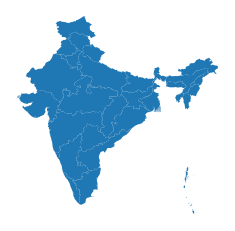

In [38]:
india=gpd.read_file('C:/Users/Sukriti Macker/Peacock Solar Data Analytics Intern/IND_adm1.shp')
india.plot()
plt.axis("off")

(66.72480316162121, 98.87660675048834, 5.316901993751466, 36.93868510723114)

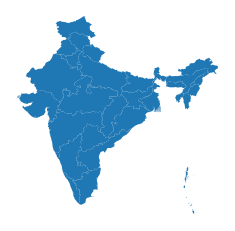

In [39]:
india2=gpd.read_file('C:/Users/Sukriti Macker/Peacock Solar Data Analytics Intern/IND_adm1.shp')
india2.plot()
plt.axis("off")

In [40]:
# Renaming the column

india.rename(columns={'NAME_1':'State Name'},inplace=True)  
india2.rename(columns={'NAME_1':'State Name'},inplace=True)

In [42]:
## Creating two tuples
'''
The tuple "states_tuple" stores all the name of the states in India
The tuple "solar_y_n" stores the binary value whether the customer would purchase the solar panel or not
'''

states_tuple = tuple(data['State Name'])
solar_y_n = tuple(data['Solar Panel Purchased or Not'])

In [43]:
'''
Separating the results of Customers:-
'state_wise_yes' dictionary contains the values for the number of customers per state who purchased the solar panel
'state_wise_no' dictionary contains the values for the number of customers per state who did not purchase the solar panel
'''

state_wise_yes={}
state_wise_no={}

for i,j in zip(states_tuple,solar_y_n):
    if j=='Yes':
        if i in state_wise_yes:
            state_wise_yes[i]+=1
        else:
            state_wise_yes[i]=1
            
    elif j=="No":
        if i in state_wise_no:
            state_wise_no[i]+=1
        else:
            state_wise_no[i]=1        

            
## Printing the results            
state_wise_yes, state_wise_no

({None: 129,
  'Delhi': 16,
  'Jharkhand': 2,
  'Bihar': 9,
  'Kerala': 3,
  'Maharashtra': 18,
  'Gujarat': 11,
  'Haryana': 8,
  'Uttar Pradesh': 21,
  'Rajasthan': 6,
  'Punjab': 3,
  'West Bengal': 5,
  'Andhra Pradesh': 7,
  'Madhya Pradesh': 10,
  'Uttarakhand': 3,
  'Himachal Pradesh': 2,
  'Orissa': 5,
  'Tamil Nadu': 1},
 {None: 2309,
  'Andhra Pradesh': 168,
  'Kerala': 20,
  'Bihar': 129,
  'Delhi': 385,
  'Maharashtra': 190,
  'Madhya Pradesh': 122,
  'Gujarat': 189,
  'Uttar Pradesh': 357,
  'Uttarakhand': 27,
  'West Bengal': 120,
  'Rajasthan': 66,
  'Punjab': 45,
  'Haryana': 172,
  'Jharkhand': 36,
  'Jammu and Kashmir': 4,
  'Chhattisgarh': 16,
  'Karnataka': 16,
  'Tamil Nadu': 40,
  'Assam': 12,
  'Orissa': 73,
  'Nagaland': 1,
  'Himachal Pradesh': 13,
  'Manipur': 1,
  'Puducherry': 2,
  'Daman and Diu': 2,
  'Meghalaya': 1})

In [44]:
## Removing the NONE value from both the above mentioned dictionaries

state_wise_no.pop(None)
state_wise_yes.pop(None)

129

## Visualizing the results are per the states of India

In [45]:
'''
Creating a list of keys and values for both dictionaries
'''
# List for keys and values for state_wise_no dictionary
no_states_keys=list(state_wise_no.keys())
no_states_values=list(state_wise_no.values())

# List for keys and values for state_wise_yes dictionary
yes_states_keys=list(state_wise_yes.keys())
yes_states_values=list(state_wise_yes.values())

In [46]:
# Creating the dataframe for customers who said 'no' to the product

no_dataframe=pd.DataFrame(data=[],columns=['State Name','Count No'])

In [47]:
## Filling in the values in the no_dataframe for customers who said 'no' to the product

no_dataframe['State Name']=no_states_keys
no_dataframe['Count No']=no_states_values

In [48]:
# Creating the dataframe for customers who said 'yes' to the product

yes_dataframe=pd.DataFrame(data=[],columns=['State Name','Count yes'])

In [49]:
## Filling in the values in the yes_dataframe for customers who said 'yes' to the product

yes_dataframe['State Name']=yes_states_keys
yes_dataframe['Count Yes']=yes_states_values

## Observing the results for the customers who purchased the product in various states

In [50]:
merge=india.merge(yes_dataframe,on='State Name',how='right') #yes

Text(0.5, 1, 'STATES WHERE CUSTOMERS BOUGHT SOLAR PANELS')

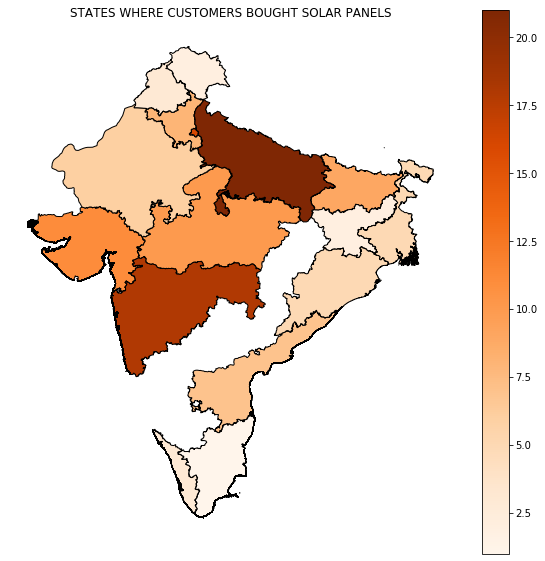

In [234]:
merge.plot(column='Count Yes',cmap='Oranges',figsize=(10,10),legend=True,edgecolor='black',classification_kwds={'bins':[50,100,150,200,250,300,350,400]})
plt.axis("off")
plt.title("STATES WHERE CUSTOMERS BOUGHT SOLAR PANELS")

In [235]:
## Extracting the above results are per states

mapy1={}
for key in yes_states_keys:
    val=state_wise_no[key]
    mapy1[key]=val
    
mapy1

{'Delhi': 385,
 'Jharkhand': 36,
 'Bihar': 129,
 'Kerala': 20,
 'Maharashtra': 190,
 'Gujarat': 189,
 'Haryana': 172,
 'Uttar Pradesh': 357,
 'Rajasthan': 66,
 'Punjab': 45,
 'West Bengal': 120,
 'Andhra Pradesh': 168,
 'Madhya Pradesh': 122,
 'Uttarakhand': 27,
 'Himachal Pradesh': 13,
 'Orissa': 73,
 'Tamil Nadu': 40}

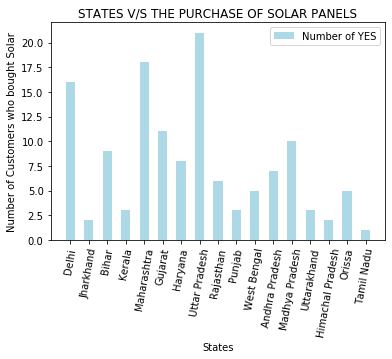

In [246]:
## Observing the graph to see the sale where the customers purchased the product

x_=np.arange(0,17,1)

plt.bar(x_,state_wise_yes.values(),width=0.5,label="Number of YES", color="lightblue")

plt.xticks(x_,mapy1.keys())
plt.xlabel("States")
plt.ylabel("Number of Customers who bought Solar")
plt.title("STATES V/S THE PURCHASE OF SOLAR PANELS")
plt.xticks(rotation=80)
plt.legend()
plt.show()

## Observing the results for the customers who did not purchase the product in various states

In [52]:
merge2=india2.merge(no_dataframe,on='State Name',how='right') #no

Text(0.5, 1, 'STATES WHERE CUSTOMERS DID NOT BUY SOLAR PANELS')

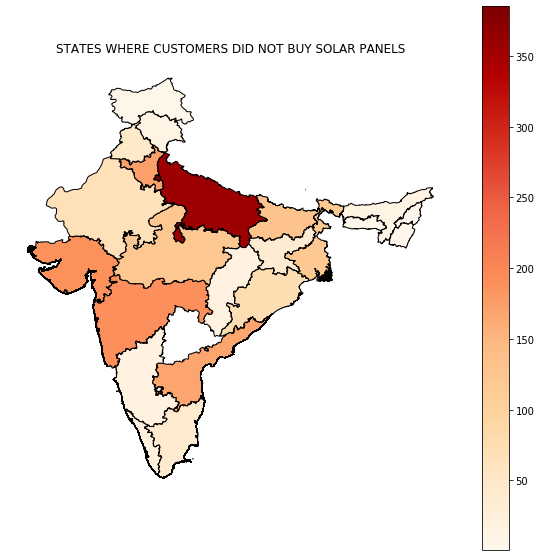

In [247]:
merge2.plot(column='Count No',cmap='OrRd',figsize=(10,10),legend=True,edgecolor='black',classification_kwds={'bins':[50,100,150,200,250,300,350,400]})
plt.axis("off")
plt.title("STATES WHERE CUSTOMERS DID NOT BUY SOLAR PANELS")

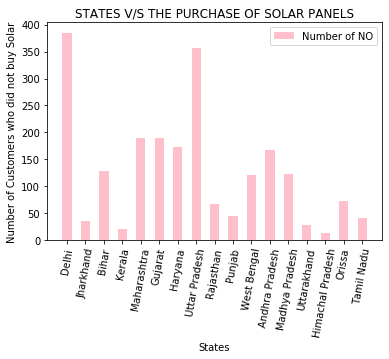

In [248]:
## Observing the graph to see the sale where the customers did not purchase the product

x_=np.arange(0,17,1)

plt.bar(x_,mapy1.values(),width=0.5,label="Number of NO", color="pink")
plt.xticks(x_,mapy1.keys())
plt.xlabel("States")
plt.ylabel("Number of Customers who did not buy Solar")
plt.title("STATES V/S THE PURCHASE OF SOLAR PANELS")
plt.xticks(rotation=80)
plt.legend()
plt.show()